# MNIST-pytorch

## Principe :

Choix du Jeu de Données et du Modèle
- problème de classification relativement simple :
- Jeu de données MNIST (classification de chiffres manuscrits) et classification multiclasse (les 26 lettres)
- Modèle de réseau de neurones convolutif (CNN) relativement simple

## Activation de l'environnnement et Installation des dépendances système

In [35]:
!source venv/bin/activate
!pip install torch torchvision matplotlib

 ## Création du package du module MNIST-classifier

In [62]:
!pip install build twine
!python -m build mnist_classifier_module_project

* Creating isolated environment: venv+pip...
* Installing packages in isolated environment:
  - setuptools
  - wheel
* Getting build dependencies for sdist...
running egg_info
writing src/mnist_classifier.egg-info/PKG-INFO
writing dependency_links to src/mnist_classifier.egg-info/dependency_links.txt
writing requirements to src/mnist_classifier.egg-info/requires.txt
writing top-level names to src/mnist_classifier.egg-info/top_level.txt
reading manifest file 'src/mnist_classifier.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'src/mnist_classifier.egg-info/SOURCES.txt'
* Building sdist...
running sdist
running egg_info
writing src/mnist_classifier.egg-info/PKG-INFO
writing dependency_links to src/mnist_classifier.egg-info/dependency_links.txt
writing requirements to src/mnist_classifier.egg-info/requires.txt
writing top-level names to src/mnist_classifier.egg-info/top_level.txt
reading manifest file 'src/mnist_classifier.egg-info/SOURCES.txt'
adding license fi

 ##  Installation du module MNIST-classifier

In [63]:
!pip install -e mnist_classifier_module_project

Obtaining file:///home/ebraux/_LOCAL/enseignement/python/python-labs/stock/module/mnist_classifier_module_project
  Installing build dependencies ... one
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mnist_classifier (pyproject.toml) ... done
  Created wheel for mnist_classifier: filename=mnist_classifier-0.1.0-0.editable-py3-none-any.whl size=2405 sha256=1c4426fa0885f972abfeb72bd42341b50203bd3ec5f12b251ec7cc5af4e8276f
  Stored in directory: /tmp/pip-ephem-wheel-cache-x4stmp_x/wheels/e7/7e/91/a3d7beb7d1bbdeaad59a69e6acaa1cbe722693ca39ee50a6d1
Successfully built mnist_classifier
  Attempting uninstall: mnist_classifier
    Found existing installation: mnist_classifier 0.1.0
    Uninstalling mnist_classifier-0.1.0:
      Successfully uninstalled mnist_classifier-0.1.0


# Utilisation du modèle

## Chargement et préparation des données

- Préparer les transformations de données
    - `transforms.Normalize((0.1307,), (0.3081,))` : normalisation des images
- Charger les datasets d'entraînement et de test
    - `batch_size=64` : traiter 64 images à la fois
- Créer des DataLoaders
    - `root='./data'` : chemin pour stocker les données
    - `transform=transform` : fonction de transformation des données (ici normalisation)
    - `train=` : `True` pour les données d'entrainement, et `False` pour les données de test
  
 
  

In [64]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


# Transformations des données
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Chargement des données
train_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Chargement des données de test
test_dataset = torchvision.datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Préparation des loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Entrainement du modèle

- Initialiser le modèle : appel de la classe `MNISTClassifier`
- Définir la fonction de perte (Cross-Entropy)
  - `nn.CrossEntropyLoss()` : adapté à la classification multiclasse
- Choisir un optimiseur (Adam)
  - `optim.Adam` :
  - `lr=0.001` : taux d'apprentissage
- Entraîner le modèle
  
 
  

In [65]:
import torch
from torchvision import datasets, transforms
from mnist_classifier import MNISTClassifier

# Créer le modèle
model = MNISTClassifier()
    
# Entraînement
train_losses = model.train_model(train_loader)

#model.save_model()


Epoch [1/5], Step [0/938], Loss: 2.3462
Epoch [1/5], Step [100/938], Loss: 0.6963
Epoch [1/5], Step [200/938], Loss: 0.3583
Epoch [1/5], Step [300/938], Loss: 0.2561
Epoch [1/5], Step [400/938], Loss: 0.1264
Epoch [1/5], Step [500/938], Loss: 0.3613
Epoch [1/5], Step [600/938], Loss: 0.1384
Epoch [1/5], Step [700/938], Loss: 0.1911
Epoch [1/5], Step [800/938], Loss: 0.1080
Epoch [1/5], Step [900/938], Loss: 0.1573
Epoch [1/5], Loss: 0.2540, Accuracy: 92.52%
Epoch [2/5], Step [0/938], Loss: 0.1146
Epoch [2/5], Step [100/938], Loss: 0.0668
Epoch [2/5], Step [200/938], Loss: 0.0755
Epoch [2/5], Step [300/938], Loss: 0.0676
Epoch [2/5], Step [400/938], Loss: 0.1094
Epoch [2/5], Step [500/938], Loss: 0.0700
Epoch [2/5], Step [600/938], Loss: 0.1195
Epoch [2/5], Step [700/938], Loss: 0.0710
Epoch [2/5], Step [800/938], Loss: 0.1485
Epoch [2/5], Step [900/938], Loss: 0.0798
Epoch [2/5], Loss: 0.1097, Accuracy: 96.71%
Epoch [3/5], Step [0/938], Loss: 0.0329
Epoch [3/5], Step [100/938], Loss: 0

## Evaluation du modèle

### Précision du modèle

Précision attendue autour de 95-97% 


In [66]:
accuracy, predictions, true_labels = model.evaluate_model(test_loader)

Test Accuracy: 97.38%


### Analyse détaillée des performances 

Name: mnist_classifier
Version: 0.1.0
Summary: A Model example package
Home-page: 
Author: 
Author-email: Emmanuel Braux <emmanuel.braux@imt-atlantique.fr>
License: 
Location: /home/ebraux/_LOCAL/enseignement/python/python-labs/stock/module/venv/lib/python3.10/site-packages
Requires: torch
Required-by: 


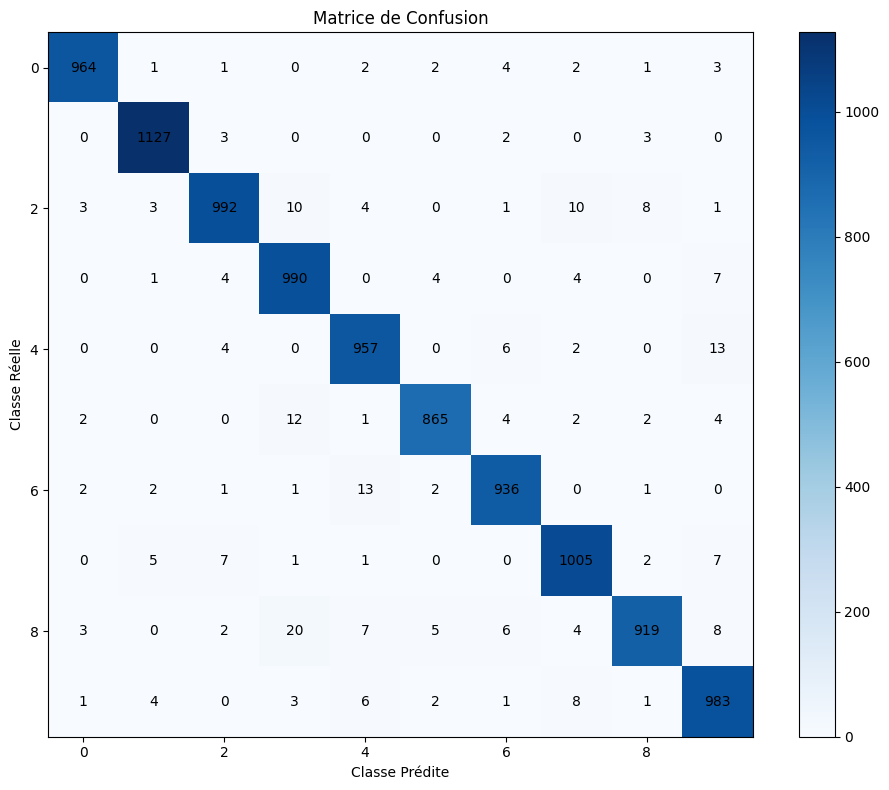

In [70]:
#import torch
#import mnistclassifier
#from mnistclassifier.view import detailed_model_evaluation
#from .mnistclassifier import MNISTClassifier
#from . import views 

#import mnistclassifier
#confusion_mat = mnistclassifier.views.detailed_model_evaluation(model, test_loader)
#confusion_mat = mnist_classifier.views.detailed_model_evaluation(model, test_loader)

# ---
#!pip uninstall mnist_classifier -y
#!pwd
#!cd mnist_classifier_module_project; pip install -e .
#!pip list | grep  mnist
!pip show mnist_classifier


#import sys
#print(sys.path)
#sys.path.append("/home/ebraux/_LOCAL/enseignement/python/python-labs/stock/module/mnist_classifier_module_project/src/")
#print(sys.path)

# OK
#import mnist_classifier
#confusion_mat = mnist_classifier.views.detailed_model_evaluation(model, test_loader)

# OK
from mnist_classifier.views import detailed_model_evaluation
confusion_mat = detailed_model_evaluation(model, test_loader)


## Sauvegarde du modèle

### Sauvegarde des Poids et paramètres du modèle

- sauvegarde dans `mnist_classifier.pth` dans le répertoire courant
- `state_dict()` ne sauvegarde que les poids et paramètres
- Méthode recommandée car plus légère et flexible

In [ ]:
# Sauvegarde des paramètres
model.save_model()

In [ ]:
!ls -l *.pth

## Prédictions

Initiliasation du modèle avec des poids provenant d'un entrainement

- `demo_prediction` : 
    - Charge un batch de données de test
    - Réalise des prédictions
    - Visualise les résultats avec les prédictions et les vraies étiquettes
- `demo_individual_prediction` :
    - Charge une image, avec possibilité de choisir son index
    - Réalise la prédictions

### Fonctions de prédiction

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

 
def demo_prediction(model):
    # Configuration
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    # Charger quelques données de test
    test_dataset = torchvision.datasets.MNIST(
        root='./data', 
        train=False,
        download=True, 
        transform=transform
    )
    
    # Créer un petit DataLoader pour la démonstration
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
   
    
    # Obtenir un batch de données pour la démonstration
    images, true_labels = next(iter(test_loader))
    
    # Faire des prédictions
    predictions = model.predict(images)
    
    # Visualiser les résultats
    plt.figure(figsize=(15, 3))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i].squeeze().numpy(), cmap='gray')
        color = 'green' if predictions[i] == true_labels[i] else 'red'
        plt.title(f'Pred: {predictions[i]}\nVrai: {true_labels[i]}', 
                 color=color, 
                 fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Afficher quelques statistiques
    correct = (predictions == true_labels).sum().item()
    total = len(predictions)
    print(f"Précision sur l'échantillon: {100 * correct / total:.2f}%")
    
    return images, predictions, true_labels

def demo_individual_prediction(model, index=None):
    """
    Faire une prédiction sur une seule image du jeu de test
    """
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    
    # Charger le dataset de test
    test_dataset = torchvision.datasets.MNIST(
        root='./data', 
        train=False,
        download=True, 
        transform=transform
    )
    
    # Si aucun index n'est spécifié, en choisir un au hasard
    if index is None:
        index = torch.randint(0, len(test_dataset), (1,)).item()
    
    # Obtenir une image
    image, true_label = test_dataset[index]
    
    # Faire une prédiction
    prediction = model.predict(image.unsqueeze(0))
    
    # Visualiser l'image et la prédiction
    plt.figure(figsize=(3, 3))
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    color = 'green' if prediction.item() == true_label else 'red'
    plt.title(f'Prédiction: {prediction.item()}\nVrai label: {true_label}', 
             color=color)
    plt.axis('off')
    plt.show()
    
    return prediction.item(), true_label

### Prédiction

In [ ]:
def main():
    
    # Chargement du modèle 
    print("\nChargement du modèle")
    # - Créer une nouvelle instance du modèle
    model = MNISTClassifier()
    # - Charger les poids sauvegardés
    model.load_model('mnist_classifier.pth')

    # Prédictions sur un échantillon
    print("\nPrédictionssur un échantillon")
    images, predictions, true_labels = demo_prediction(model)
    
    # Prédiction individuelle
    print("\nPrédiction sur une image aléatoire")
    pred, true_label = demo_individual_prediction(model)
    
#    # 4. Permettre à l'utilisateur de faire des prédictions sur des images spécifiques
#    while True:
#        try:
#            user_input = input("\nEntrez un numéro d'image (0-9999) ou 'q' pour quitter: ")
#            if user_input.lower() == 'q':
#                break
#            index = int(user_input)
#            if 0 <= index <= 9999:
#                pred, true_label = individual_prediction(model, index)
#            else:
#                print("Veuillez entrer un nombre entre 0 et 9999")
#        except ValueError:
#            print("Entrée invalide")

if __name__ == '__main__':
    main()